In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

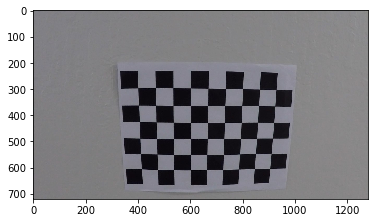

In [57]:
# Calibrate camera
# Read in calibration image
img = mpimg.imread('./camera_cal/calibration17.jpg')
plt.imshow(img)

In [58]:
# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) # x, y coordinates

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Use cv2.calibrateCamera and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return dst

undistorted = cal_undistort(img, [objp], [corners])

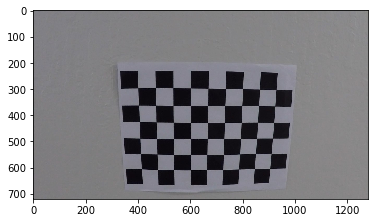

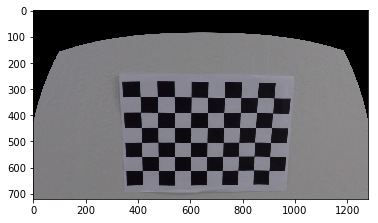

In [59]:
plt.imshow(img)
plt.show()
plt.imshow(undistorted)
plt.show()

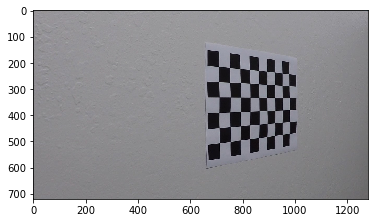

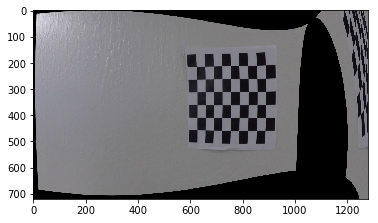

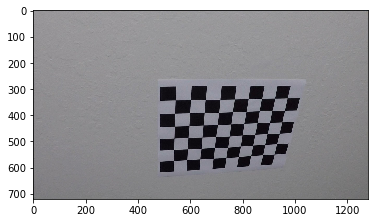

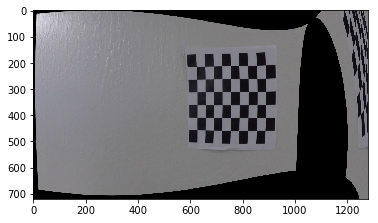

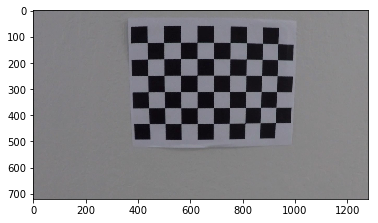

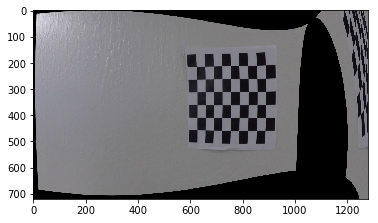

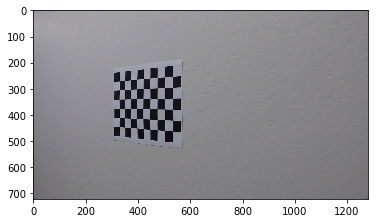

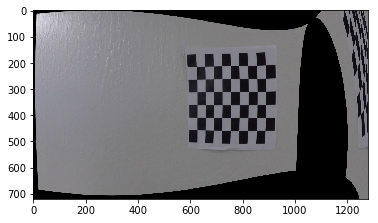

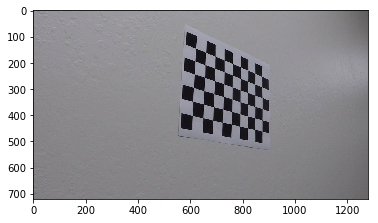

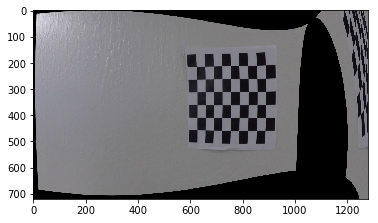

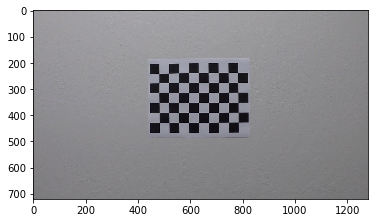

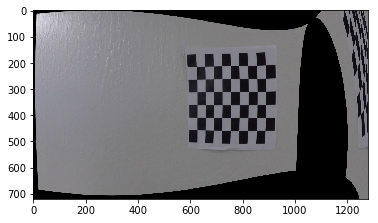

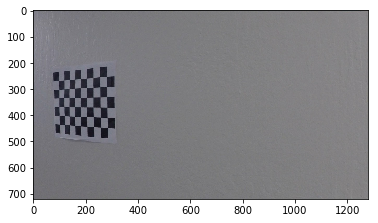

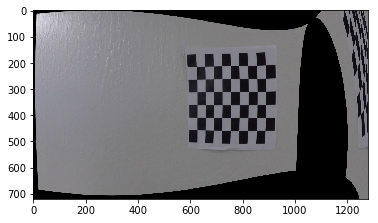

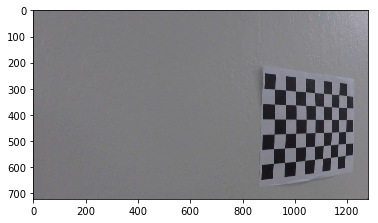

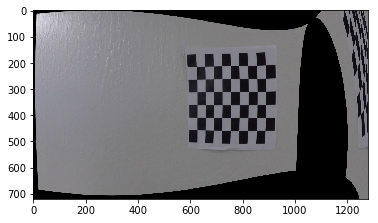

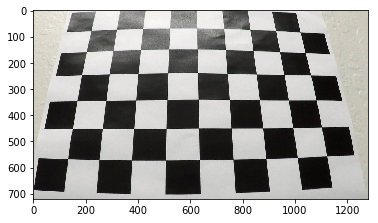

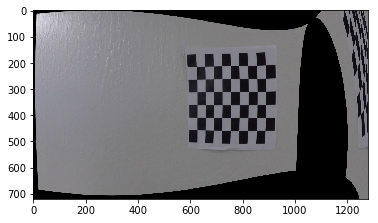

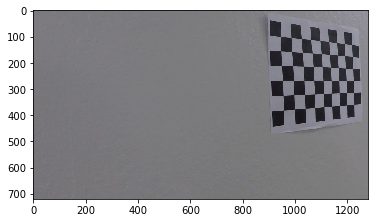

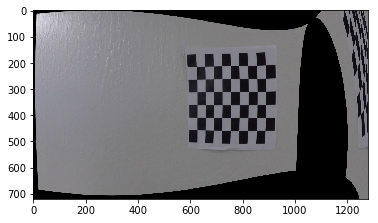

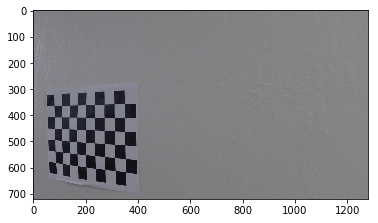

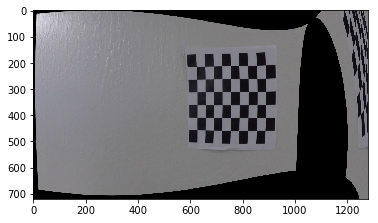

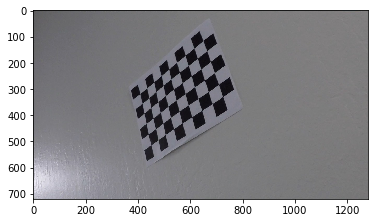

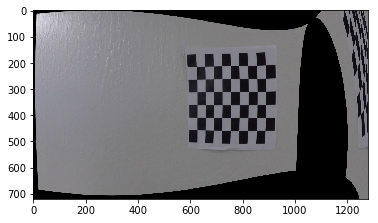

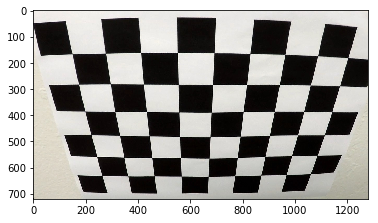

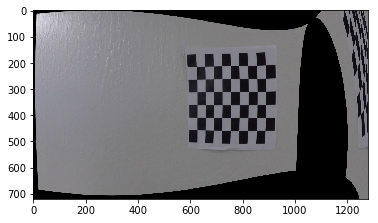

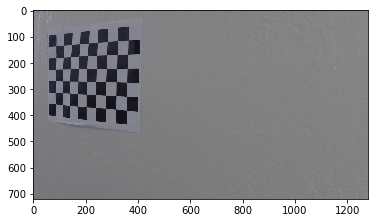

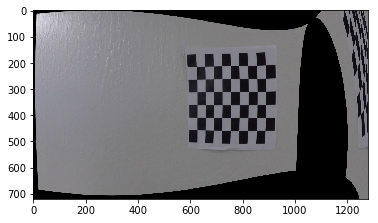

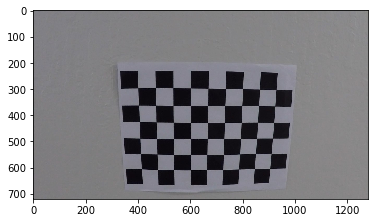

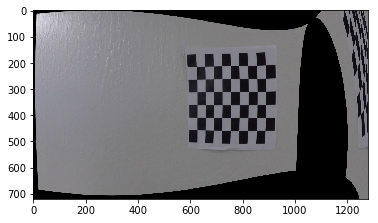

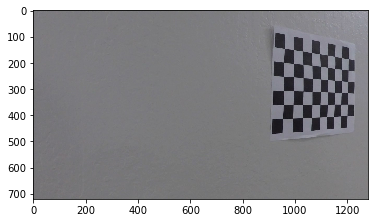

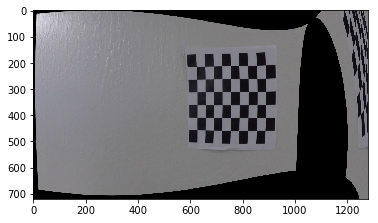

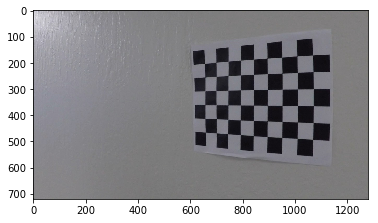

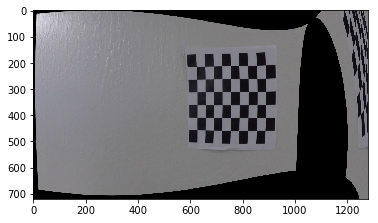

In [66]:
import glob

images = glob.glob('./camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

mtx_list = []
dist_list = []

raw_images = [] # Raw images
undistorted = [] # Undistorted images

objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) # x, y coordinates


def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # Use cv2.calibrateCamera and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    return dst

for fname in images:
    # Read in each image
    img = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    # If corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # Use cv2.calibrateCamera and cv2.undistort()
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape, None, None)
        
        mtx_list.append(mtx)
        dist_list.append(dist)
        
        raw_images.append(img)
        undistorted.append(cv2.undistort(img, mtx, dist, None, mtx))

        plt.imshow(img)
        plt.show()
        plt.imshow(undist)
        plt.show()


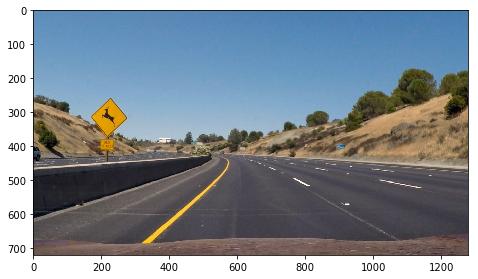

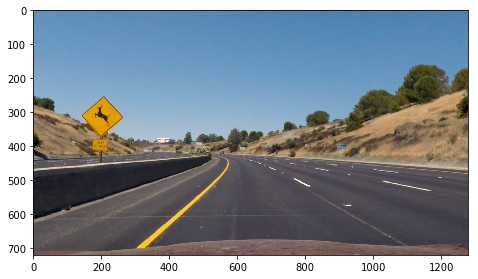

In [79]:
# test_images = glob.glob('./test_images/test*.jpg')

# Read in each image
img = mpimg.imread('./test_images/test2.jpg')
    
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
# Use cv2.calibrateCamera and cv2.undistort()
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape, None, None)

undistorted = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(8, 4.5))
plt.imshow(img)
plt.show()
plt.figure(figsize=(8, 4.5))
plt.imshow(undistorted)
plt.show()


In [108]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    orient_to_params = {'x': (1, 0), 'y': (0, 1)}
    sobel = np.abs(cv2.Sobel(img, cv2.CV_64F, orient_to_params[orient][0], orient_to_params[orient][1], ksize=sobel_kernel))
    scaled_sobel = np.uint8(255*sobel/np.max(sobel))
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1

    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Calculate gradient magnitude
    # Apply threshold
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    sobel = (sobel_x**2 + sobel_y**2)**0.5

    scaled_sobel = np.uint8(255*sobel/np.max(sobel))
    
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel > mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1    

    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    abs_sobel_x = np.abs(sobel_x)
    abs_sobel_y = np.abs(sobel_y)
    
    direction = np.arctan2(abs_sobel_y, abs_sobel_x)

    dir_binary = np.zeros_like(direction)
    dir_binary[(direction > thresh[0]) & (direction < thresh[1])] = 1

    return dir_binary

In [120]:
ksize = 13 # Choose a larger odd number to smooth gradient measurements

gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(80, 255))
grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(0, 255))
mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(70, 255))
dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(np.pi/8, 3 * np.pi/8))

combined = np.zeros_like(gray)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

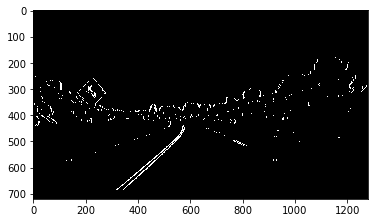

In [121]:
# plt.imshow(gray, cmap='gray')
plt.imshow(gradx, cmap='gray')
# plt.imshow(combined, cmap='gray')
plt.show()

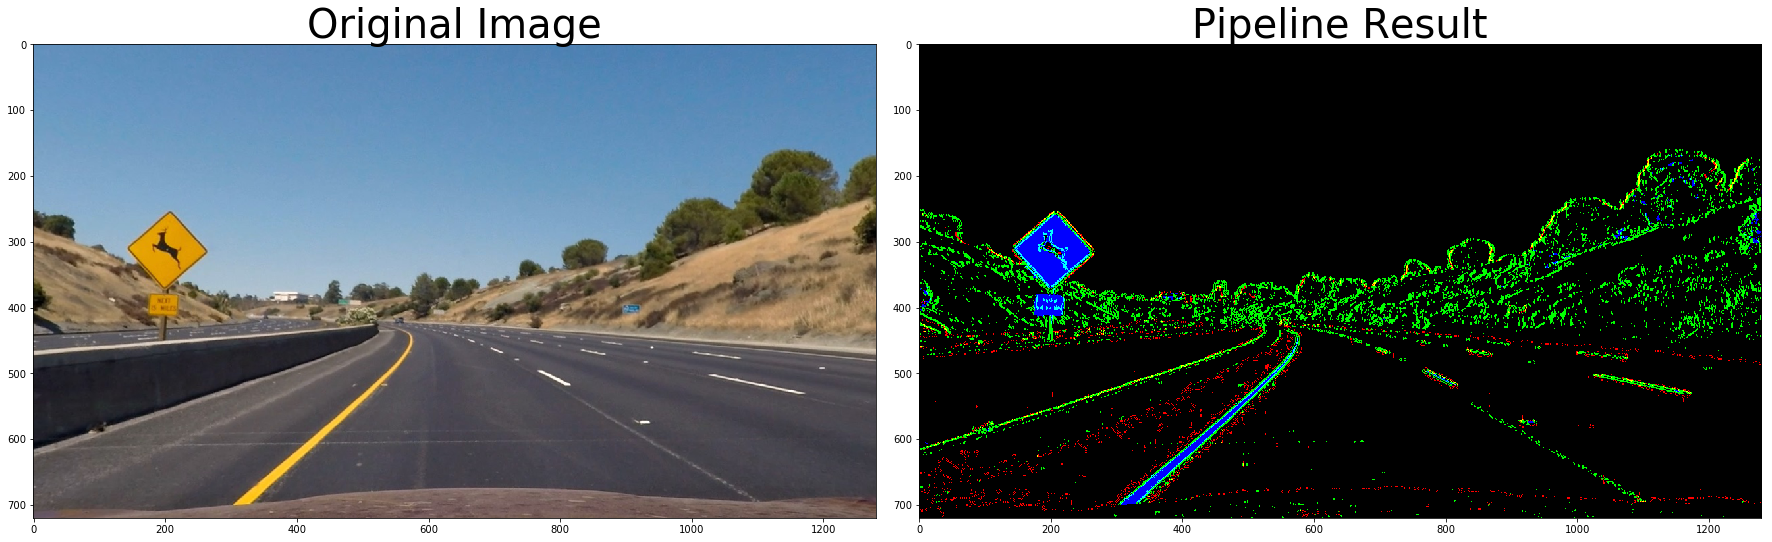

In [136]:
def pipeline(img, h_thresh=(30, 100), s_thresh=(170, 255), sx_thresh=(20, 100)):
    # Convert to HSV color space and separate the V channel
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel = hsv[:,:,0]
    l_channel = hsv[:,:,1]
    s_channel = hsv[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold s channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Threshold h channel
    h_sobelx = cv2.Sobel(h_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    h_abs_sobelx = np.absolute(h_sobelx) # Absolute x derivative to accentuate lines away from horizontal
    h_scaled_sobel = np.uint8(255*h_abs_sobelx/np.max(h_abs_sobelx))
    
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_scaled_sobel >= h_thresh[0]) & (h_scaled_sobel <= h_thresh[1])] = 1
    
#     plt.imshow(h_binary)
#     plt.show()

    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack((h_binary, sxbinary, s_binary))
#     color_binary[:, :, 0] = h_binary
#     color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary
    
result = pipeline(undistorted)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(undistorted)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)